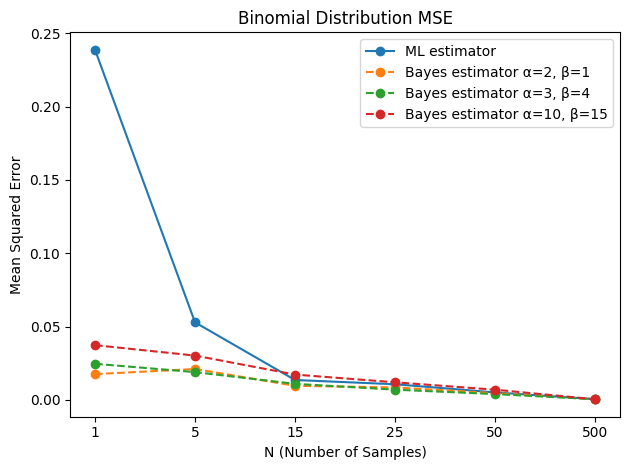

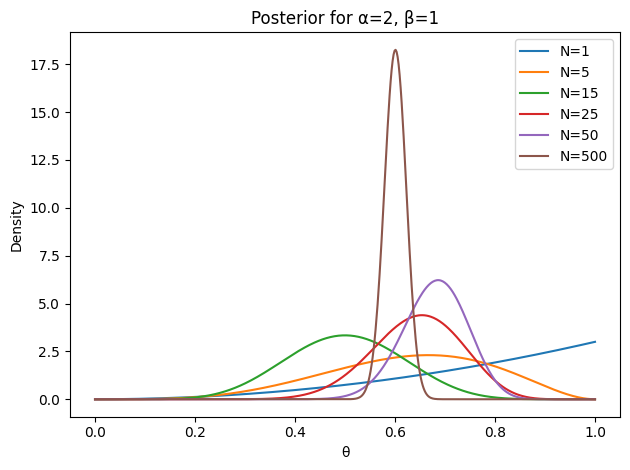

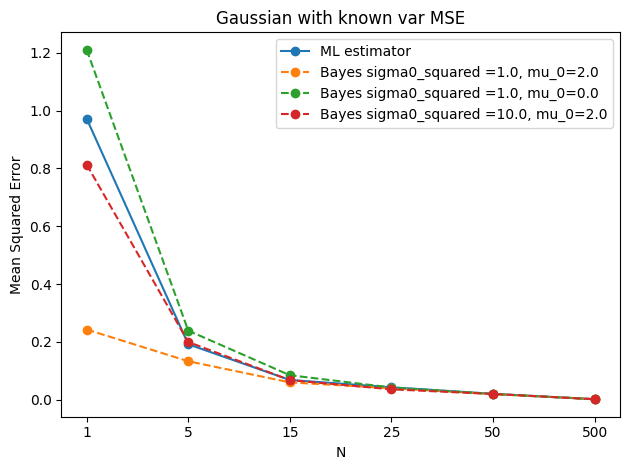

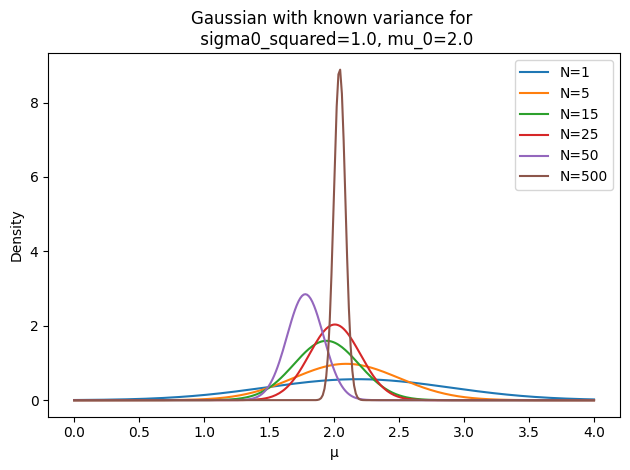

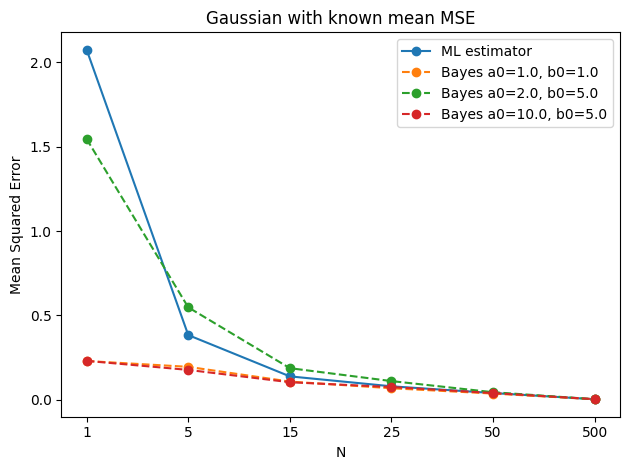

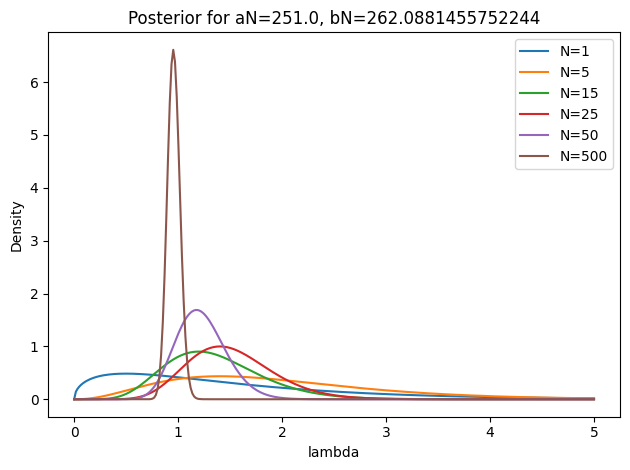

In [ ]:
# Project 1: Conjugate Priors (Sheikh Islam, Wilson Jimenez, & Talha Akhlaq)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist #need to use beta_dist because beta is a variable
from scipy.stats import norm
from scipy.stats import gamma

#binomial case
N = [1,5,15,25,50,500] #number of samples

def binomial(x,y,N):
  assumed_prob = 0.6
  data = np.random.binomial(1, assumed_prob, size=N)
  m = np.sum(data)
  mean_ML = m/N #the max likelihood estimate

  #setting initial hyperparameters for prior
  a,b = x,y

  #updating hyperperameters
  a = a + m
  b = b + N - m

  #posterior
  posterior_mean = a/(a + b)

  #computing the mean squared average
  error_ML = (mean_ML - assumed_prob)**2
  error_posterior = (posterior_mean - assumed_prob)**2
  return error_ML, error_posterior

hyperparameters = [(2, 1), (3, 4), (10, 15)] #tesing different a,b pairs

# collecting all the MSE curves
all_mse_ML = []
all_mse_post = []

for alpha, beta in hyperparameters: #testing differnet parameters amd storing the error
  mse_ML = [] #storing the average errors for each N
  mse_posterior = []

  for n in N:
    total_error_ML = [] #storing the errors obtained per N
    total_error_posterior = []

    for i in range(500): #testing each set of hyperparameters multiple timesfor each N
      error_ML, error_posterior = binomial(alpha, beta, n)
      total_error_ML.append(error_ML)
      total_error_posterior.append(error_posterior)

    # recording average mean squared errors for each hyperparameter
    mse_ML.append(np.mean(total_error_ML))
    mse_posterior.append(np.mean(total_error_posterior))

  # storing for combined plotting
  all_mse_ML.append(mse_ML)
  all_mse_post.append(mse_posterior)

# Plotting them all in one figure
x = np.arange(len(N))
plt.figure()
# ML curve
plt.plot(x, all_mse_ML[0], marker='o', label='ML estimator')
# one Bayes curve per hyperparameter
for (alpha, beta), mse_p in zip(hyperparameters, all_mse_post):
  plt.plot(x, mse_p, marker='o', linestyle='--',
           label=f'Bayes estimator α={alpha}, β={beta}')

plt.xlabel('N (Number of Samples)')
plt.ylabel('Mean Squared Error')
plt.xticks(x, N)
plt.title('Binomial Distribution MSE')
plt.legend()
plt.tight_layout()
plt.show()

#plotting the posterior density for one of the hyperparameter pairs
alpha, beta = hyperparameters[0]
x_vals = np.linspace(0, 1, 500)
plt.figure()
for n in N:
    data_example = np.random.binomial(1, 0.6, size=n)
    m_example = np.sum(data_example)
    a_post = alpha + m_example
    b_post = beta + n - m_example
    posterior = beta_dist.pdf(x_vals, a_post, b_post)
    plt.plot(x_vals, posterior, label=f'N={n}')

plt.title(f'Posterior for α={alpha}, β={beta}')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


#Gaussian with known variance
def gaussian_var(sigma0_squared,mu_0n, N):
  assumed_mean = 2.0
  sigma_squared = 1.0 #the known variance

  data = np.random.normal(assumed_mean, np.sqrt(sigma_squared), size = N) # this function takes std dev as the second input

  #max likelihood estimate 1/N*sum
  mu_ML = np.mean(data)

  #posterior variance and mean update equations
  sigma_N_squared = 1 / (N / sigma_squared + 1 / sigma0_squared)
  mu_N = sigma_N_squared * (N * mu_ML / sigma_squared + mu_0 / sigma0_squared)

  #computing the mean squared average
  error_ML = (mu_ML - assumed_mean) ** 2
  error_posterior = (mu_N - assumed_mean) ** 2
  return error_ML, error_posterior

# Choosing 3 different sets of hpyerparameters(sigma0_squared, mu_0)
hyperparameters = [(1.0, 2.0), (1.0, 0.0), (10.0, 2.0)]


all_mse_ML = []
all_mse_post = []

# simulating and compute MSE
for sigma0_squared, mu_0 in hyperparameters:
  mse_ML = []
  mse_Bayes = []
  for n in N:
    total_error_ML = []
    total_error_posterior = []
    for i in range(500):
        error_ML, error_post = gaussian_var(sigma0_squared, mu_0, n)
        total_error_ML.append(error_ML)
        total_error_posterior.append(error_post)

    mse_ML.append(np.mean(total_error_ML))
    mse_Bayes.append(np.mean(total_error_posterior))

  # storing for combined plotting
  all_mse_ML.append(mse_ML)
  all_mse_post.append(mse_Bayes)

x = np.arange(len(N))
plt.figure()
plt.plot(x, all_mse_ML[0], marker='o', label='ML estimator')
for (s0, m0), mse_p in zip(hyperparameters, all_mse_post):
  plt.plot(x, mse_p, marker='o', linestyle='--', label=f'Bayes sigma0_squared ={s0}, mu_0={m0}')
plt.xlabel('N')
plt.ylabel('Mean Squared Error')
plt.xticks(x, N)
plt.title('Gaussian with known var MSE')
plt.legend()
plt.tight_layout()
plt.show()

#plotting posterior
sigma0_squared, mu_0 = hyperparameters[0]
assumed_mean  = 2.0
sigma_squared = 1.0  # known variance
x_vals = np.linspace(0, 4, 300)

plt.figure()
for n in N:
    # generating data
    data_example = np.random.normal(assumed_mean, np.sqrt(sigma_squared), size=n)
    mu_ML = np.mean(data_example)

    # posterior update
    sigma_N_squared = 1.0 / (n / sigma_squared + 1.0 / sigma0_squared)
    mu_N = sigma_N_squared * (n * mu_ML / sigma_squared + mu_0 / sigma0_squared)

    # posterior density
    posterior = norm.pdf(x_vals, loc=mu_N, scale=np.sqrt(sigma_N_squared))
    plt.plot(x_vals, posterior, label=f'N={n}')

plt.title(f'Gaussian with known variance for \n sigma0_squared={sigma0_squared}, mu_0={mu_0}')
plt.xlabel('μ')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

#Gaussian with known mean and unkown variance
def gaussian_mean(a0, b0, N):
    given_mean = 2.0
    assumed_variance = 1.0 #this is also equal to the precision since precision = 1/variance
    data = np.random.normal(given_mean, np.sqrt(assumed_variance), size=N)

    # MLE of variance
    lambda_ml = N / np.sum((data - given_mean) ** 2) # solution to the MLE function for precision
    sigma_ml2 = 1 / lambda_ml

    # MLE of mean
    mu_ml = np.mean(data)

    #Updating the hyperparameters
    a_n = a0 + N / 2
    b_n = b0 + (N/2 * sigma_ml2)

    # Posterior mean of the przecision/variance
    lambda_n = a_n / b_n
    sigma_n2 = 1 / lambda_n

    # Computing the squared errors
    error_ML = (sigma_ml2 - 1.0) ** 2
    error_posterior = (sigma_n2 - 1.0) ** 2

    return error_ML, error_posterior

all_mse_ML = []
all_mse_post = []

hyperparameters = [(1.0, 1.0), (2.0, 5.0), (10.0, 5.0)]

for a0, b0 in hyperparameters:
  mse_ML = []
  mse_Bayes = []
  for n in N:
    errs_ml = []
    errs_bayes = []
    for i in range(500):
        error_ml, error_bayes = gaussian_mean(a0, b0, n)
        errs_ml.append(error_ml)
        errs_bayes.append(error_bayes)
    mse_ML.append(np.mean(errs_ml))
    mse_Bayes.append(np.mean(errs_bayes))
  # store for combined plotting
  all_mse_ML.append(mse_ML)
  all_mse_post.append(mse_Bayes)


# combined plot
x = np.arange(len(N))
plt.figure()
plt.plot(x, all_mse_ML[0], marker='o', label='ML estimator')
for (a0, b0), mse_p in zip(hyperparameters, all_mse_post):
  plt.plot(x, mse_p, marker='o', linestyle='--',
           label=f'Bayes a0={a0}, b0={b0}')
plt.xlabel('N')
plt.ylabel('Mean Squared Error')
plt.xticks(x, N)
plt.title('Gaussian with known mean MSE')
plt.legend()
plt.tight_layout()
plt.show()

a0, b0 = [(1.0, 1.0), (2.0, 5.0), (10.0, 5.0)][0]  # pick the first IG prior
x_vals = np.linspace(0, 5, 300)
plt.figure()
for n in N:
    given_mean = 2.0
    asssumed_variance = 1.0
    data = np.random.normal(given_mean, np.sqrt(asssumed_variance), size=n)

    # MLE of variance
    lambda_ml = n / np.sum((data - given_mean) ** 2) # solution to the MLE function for precision
    sigma_ml2 = 1 / lambda_ml

    # MLE of mean
    mu_ml = np.mean(data)

    #Updating the hyperparameters
    a_n = a0 + n/2
    b_n = b0 + (n/2 * sigma_ml2)

    # Posterior mean of the przecision/variance
    lambda_n = a_n / b_n
    sigma_n2 = 1 / lambda_n

    posterior = gamma.pdf(x_vals, a_n, 0 , scale = 1.0/b_n)
    plt.plot(x_vals, posterior, label=f'N={n}')

plt.title(f'Posterior for aN={a_n}, bN={b_n}')
plt.xlabel('lambda')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

Stretch Goal #1


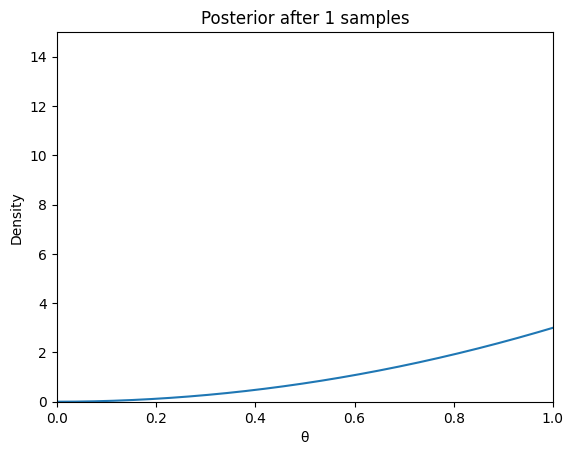

In [ ]:
# Making a movie for the binomial case
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import beta as beta_dist

# Parameters
assumed_prob = 0.6
alpha = 2
beta = 1

N = 300 #number of times im going to update the posterior
x_vals = np.linspace(0, 1, 500)
data = np.random.binomial(1, assumed_prob, size=N)

# updating the posterior distribution
fig, ax = plt.subplots()
def update_distribution(n):
    ax.clear()
    m = np.sum(data[:n]) #only counting the number of successes from the first n points of the data array
    a_post = alpha + m
    b_post = beta + n - m
    posterior = beta_dist.pdf(x_vals, a_post, b_post)
    ax.plot(x_vals, posterior)
    ax.set_title(f'Posterior after {n} samples')
    ax.set_xlabel('θ')
    ax.set_ylabel('Density')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 15)

# Creating the animation
movie = FuncAnimation(fig, update_distribution, frames=range(1, N + 1), repeat=False)

# displaying the movie in notebook
from IPython.display import HTML
HTML(movie.to_html5_video())

Stretch Goal #2

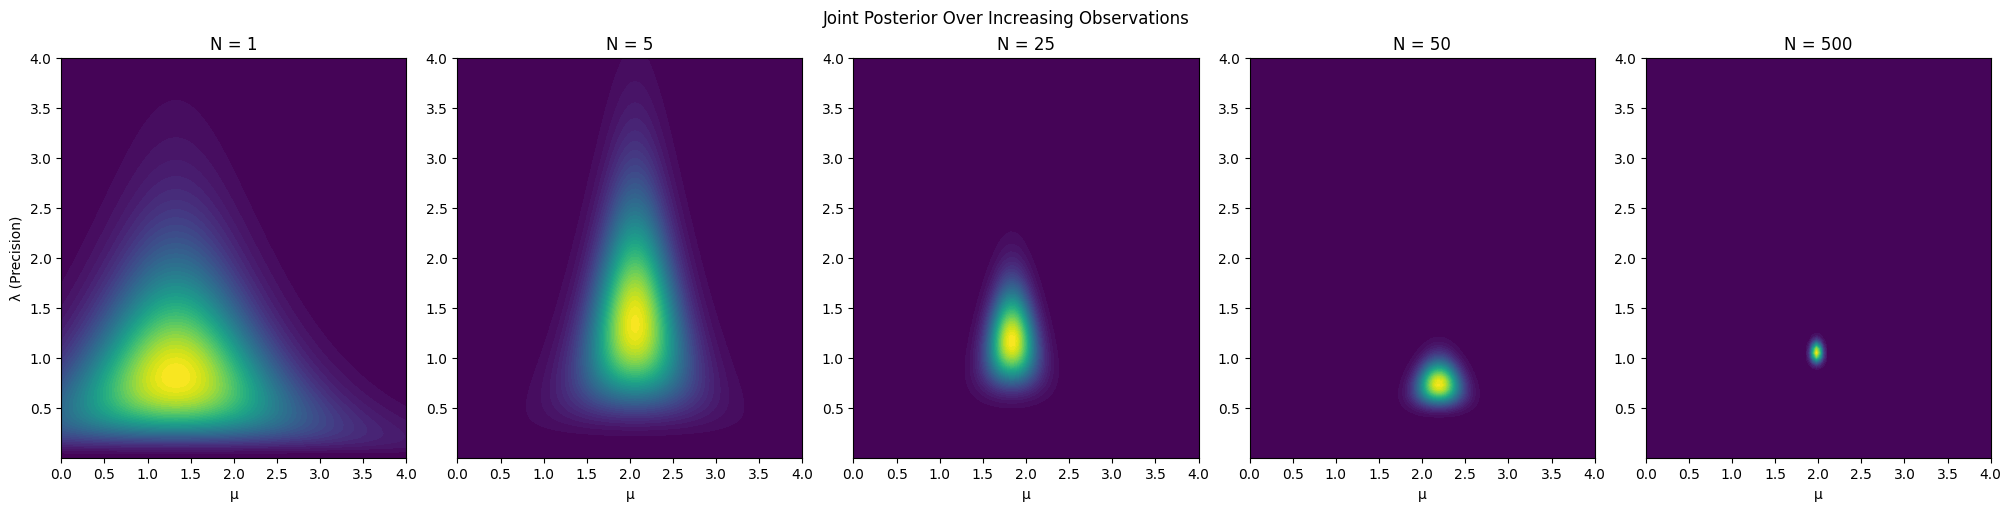

In [ ]:
#the equations used are based off the following link: https://en.wikipedia.org/wiki/Normal-gamma_distribution and the textbook
#unknown mean and variance case

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma

# assumed prior hyperparameters
mu_0 = 2.0
lambda_0 = 1.0  # prior precision for mean


#parameter for prior Gamma distribution
a_0 = 2.0
b_0 = 2.0

# actual parameters
mu_true = 2.0
sigma_true = 1.0
lambda_true = 1.0 / sigma_true**2

# different numbers of observations
n = [1, 5, 25, 50, 500]

# setting up the grid for the heatmap
mu_vals = np.linspace(0, 4, 100)
lambda_vals = np.linspace(0.001, 4, 100) #starts at 0.01 to avoid dividing by zero
mu, LAMBDA = np.meshgrid(mu_vals, lambda_vals) # Create 2D grid

#setting up the figure for a heatmap
fig, axs = plt.subplots(1, len(n), figsize=(20, 5), constrained_layout=True)


for i, N in enumerate(n):
    # Generating the data
    data = np.random.normal(mu_true, sigma_true, N)


    sample_mean = np.mean(data)
    sample_var = np.var(data)

    # Posterior hyperparameters based off the fact the conjugate prior is a normal gamma distribution
    lambda_n = lambda_0 + N
    mu_n = (lambda_0 * mu_0 + N * sample_mean) / lambda_n
    a_n = a_0 + N / 2
    b_n = b_0 + 0.5 * (N * sample_var + (lambda_0 * N * (sample_mean - mu_0)**2) / lambda_n)

    # Calculating the joint posterior based off of the form of the conjugate prior
    norm_part = norm.pdf(mu, mu_n, scale=np.sqrt(1 / (lambda_n * LAMBDA)))
    gamma_part = gamma.pdf(LAMBDA, a=a_n, scale=1 / b_n)
    posterior = norm_part * gamma_part

    # Plotting heatmap for sample size N
    ax = axs[i]
    pcm = ax.contourf(mu, LAMBDA, posterior, levels=50, cmap='viridis')
    ax.set_title(f'N = {N}')
    ax.set_xlabel('μ')
    if i == 0: #labeling the y axis on one graph
        ax.set_ylabel('λ (Precision)')

plt.suptitle("Joint Posterior Over Increasing Observations")
plt.show()